In [2]:
# pandas and visualization libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# statsmodels
import statsmodels.api as sm

In [4]:
df = pd.read_stata('reg_data.dta')
df

,email,year,institution,interests,award_year,expiration_year,award_amount,award_title,total_citations,h_index,citation,pub_num,top_cited
0,00t0holtgrav@bsu.edu,2011,Ball State University,['Social Psychology and Language'],2012,2017,0,The Role of Interpersonal Processes in the Int...,10066,46,367.0,2,135.000000
1,00t0holtgrav@bsu.edu,2012,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,409.0,4,14.666667
2,00t0holtgrav@bsu.edu,2013,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,534.0,7,281.666656
3,00t0holtgrav@bsu.edu,2014,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,550.0,8,32.333332
4,00t0holtgrav@bsu.edu,2015,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,496.0,3,14.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,zulu@msu.edu,2016,Michigan State University,['Environment/Society - natural resources gove...,2014,2015,0,Doctoral Dissertation Research: Decentralizati...,1930,21,117.0,9,29.333334
20636,zulu@msu.edu,2017,Michigan State University,['Environment/Society - natural resources gove...,2014,2015,0,Doctoral Dissertation Research: Decentralizati...,1930,21,151.0,8,5.666667
20637,zulu@msu.edu,2018,Michigan State University,['Environment/Society - natural resources gove...,2014,2015,0,Doctoral Dissertation Research: Decentralizati...,1930,21,165.0,9,39.333332
20638,zulu@msu.edu,2019,Michigan State University,['Environment/Society - natural resources gove...,2014,2015,0,Doctoral Dissertation Research: Decentralizati...,1930,21,177.0,0,0.000000


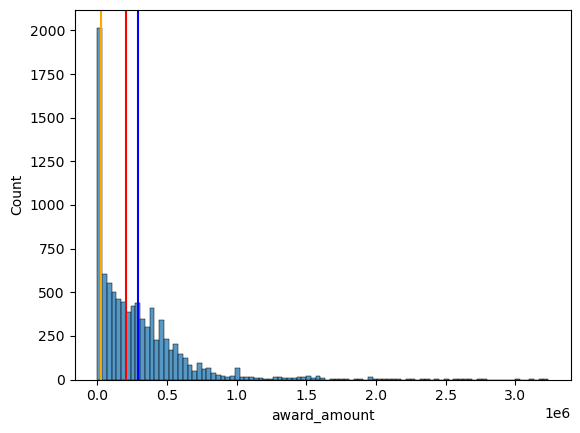

In [15]:
# Filter out data where award_amount is 0
filtered_df = df[df['award_amount'] > 0]

# Use the filtered data to plot a histogram
sns.histplot(data=filtered_df, x="award_amount")

# Add vertical lines for the mean, median, and mode on the histogram
plt.axvline(x=filtered_df['award_amount'].mean(), color='blue', label='Mean')
plt.axvline(x=filtered_df['award_amount'].median(), color='red', label='Median')
plt.axvline(x=filtered_df['award_amount'].mode().values[0], color='orange', label='Mode') # Mode

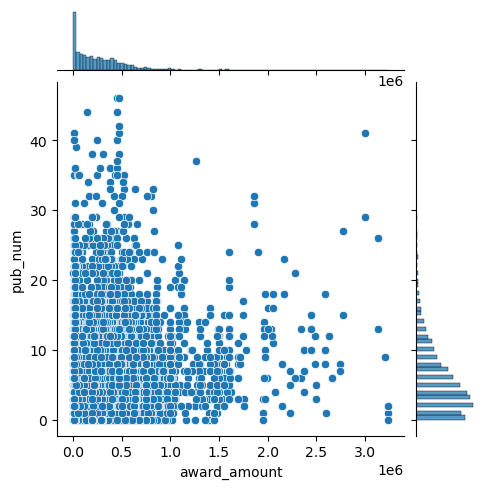

In [16]:
for column in ['pub_num', 'top_cited']:
    mean = filtered_df[column].mean()
    std = filtered_df[column].std()
    # Define the range for outliers
    lower_limit = mean - 3 * std
    upper_limit = mean + 3 * std
    # Keep only the data within (mean - 3*SD, mean + 3*SD) range
    filtered_df = filtered_df[(filtered_df[column] >= lower_limit) & (filtered_df[column] <= upper_limit)]

sns.jointplot(x = "award_amount", y = "pub_num", data = filtered_df, height = 5)

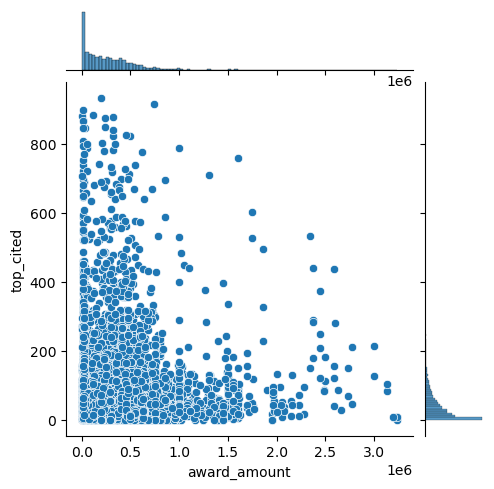

In [17]:
sns.jointplot(x = "award_amount", y = "top_cited", data = filtered_df, height = 5)

Text(33.51562500000001, 0.5, 'publication number')

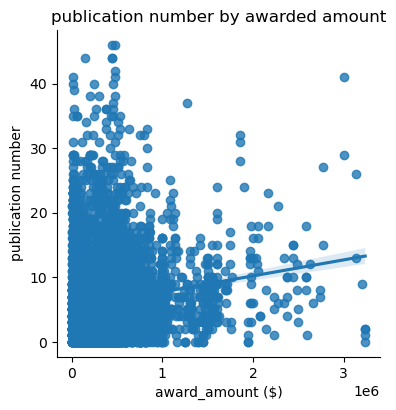

In [18]:
sns.lmplot(data = filtered_df, x = 'award_amount', y = 'pub_num', height = 4, aspect = 1)
plt.title('publication number by awarded amount', size = 12)
plt.xlabel('award_amount ($)', size = 10)
plt.ylabel('publication number', size = 10)

Text(24.640625000000007, 0.5, 'cited number')

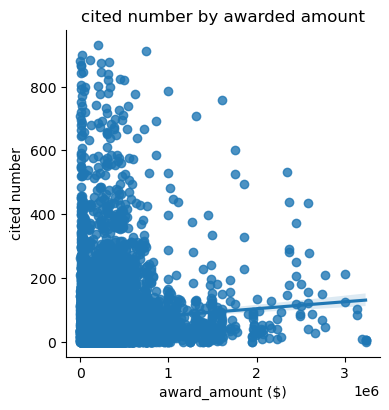

In [19]:
sns.lmplot(data = filtered_df, x = 'award_amount', y = 'top_cited', height = 4, aspect = 1)
plt.title('cited number by awarded amount', size = 12)
plt.xlabel('award_amount ($)', size = 10)
plt.ylabel('cited number', size = 10)

In [20]:
# Get the summary statistics
summary_statistics = df.describe()
print(summary_statistics)

               year    award_year  expiration_year  award_amount  \
count  20640.000000  20640.000000     20640.000000  2.064000e+04   
mean    2015.500000   2014.872093      2018.179264  1.304730e+05   
std        2.872351      2.660993         3.304241  2.703923e+05   
min     2011.000000   2011.000000      2011.000000  0.000000e+00   
25%     2013.000000   2012.000000      2015.000000  0.000000e+00   
50%     2015.500000   2015.000000      2018.000000  0.000000e+00   
75%     2018.000000   2017.000000      2021.000000  1.600000e+05   
max     2020.000000   2020.000000      2026.000000  3.236042e+06   

       total_citations       h_index      citation       pub_num     top_cited  
count     20640.000000  20640.000000  20113.000000  20640.000000  20004.000000  
mean       8797.634205     33.613372    476.106200      5.471512     84.653544  
std       17447.221015     22.731402    965.345139     10.208911    305.649815  
min           1.000000      1.000000      1.000000      0.00000

In [21]:
# Setting variables for the regression
Y1 = df['pub_num']
X1 = df[['award_amount', 'citation', 'h_index']]
X1 = X1.replace([np.inf, -np.inf], np.nan)  
X1 = X1.dropna()  
Y1 = Y1[X1.index]  
# Adding a constant to the model
X_const = sm.add_constant(X1)

# Fitting the OLS model
ols_m = sm.OLS(Y1, X_const).fit()
print(ols_m.summary())

                            OLS Regression Results                            
Dep. Variable:                pub_num   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     985.0
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:26:23   Log-Likelihood:                -74084.
No. Observations:               20113   AIC:                         1.482e+05
Df Residuals:                   20109   BIC:                         1.482e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2490      0.141      1.771   

In [22]:
# Setting variables for the regression
Y2 = df['top_cited']
X = df[['award_amount', 'citation', 'h_index']]
Y2 = Y2.replace(np.nan, 0)
X = X.replace([np.inf, -np.inf], np.nan)  
X = X.dropna()  
Y2 = Y2[X.index]  
# Adding a constant to the model
X_const = sm.add_constant(X)

# Fitting the OLS model
ols_m2 = sm.OLS(Y2, X_const).fit()
print(ols_m2.summary())

                            OLS Regression Results                            
Dep. Variable:              top_cited   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     895.3
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:26:28   Log-Likelihood:            -1.4232e+05
No. Observations:               20113   AIC:                         2.847e+05
Df Residuals:                   20109   BIC:                         2.847e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           26.6136      4.183      6.363   

In [23]:
df['dummy_award'] = (df['award_amount'] != 0).astype(int)

# Setting variables for the regression
Y3 = df['pub_num']
X3 = df[['dummy_award', 'citation', 'h_index']]
X3 = X3.replace([np.inf, -np.inf], np.nan)  
X3 = X3.dropna()  
Y3 = Y3[X.index]  
# Adding a constant to the model
X_const = sm.add_constant(X3)

# Fitting the OLS model
ols_m3 = sm.OLS(Y3, X_const).fit()
print(ols_m3.summary())

                            OLS Regression Results                            
Dep. Variable:                pub_num   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     988.8
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:26:47   Log-Likelihood:                -74079.
No. Observations:               20113   AIC:                         1.482e+05
Df Residuals:                   20109   BIC:                         1.482e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0590      0.151     -0.392      

In [24]:
# Setting variables for the regression
Y4 = df['top_cited']
Y4 = Y4.replace(np.nan, 0)
X4 = df[['dummy_award', 'citation', 'h_index']]
X4 = X4.replace([np.inf, -np.inf], np.nan)  
X4 = X4.dropna()  
Y4 = Y4[X.index]  
# Adding a constant to the model
X_const = sm.add_constant(X4)

# Fitting the OLS model
ols_m4 = sm.OLS(Y4, X_const).fit()
print(ols_m4.summary())

                            OLS Regression Results                            
Dep. Variable:              top_cited   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     901.7
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:27:21   Log-Likelihood:            -1.4232e+05
No. Observations:               20113   AIC:                         2.846e+05
Df Residuals:                   20109   BIC:                         2.847e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          33.4035      4.484      7.450      

In [25]:
# Create dummy variables for the year, set drop_first=True to avoid multicollinearity
year_dummies = pd.get_dummies(df['year'], prefix='d', drop_first=False)

# Select nine dummy variables that do not include 2020
year_dummies = year_dummies.iloc[:, :-1]  # Assuming the last column is d2020

# Set dependent variable Y5 and independent variables X5
Y5 = df['pub_num']
X5 = df[['award_amount', 'citation', 'h_index']]

# Check and handle NaN values
X5 = X5.replace([np.inf, -np.inf], np.nan).dropna()
Y5 = Y5[X5.index]

# Add the dummy variables to X5
X5 = pd.concat([X5, year_dummies.loc[X5.index]], axis=1)

# Add a constant to X5 to fit the intercept
X5_const = sm.add_constant(X5)

# Fit the OLS model
ols_m5 = sm.OLS(Y5, X5_const).fit()

# Print the model summary
print(ols_m5.summary())

                            OLS Regression Results                            
Dep. Variable:                pub_num   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:27:52   Log-Likelihood:                -74073.
No. Observations:               20113   AIC:                         1.482e+05
Df Residuals:                   20100   BIC:                         1.483e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0488      0.243      0.201   

In [31]:
# Create dummy variables for the year, set drop_first=True to avoid multicollinearity
year_dummies = pd.get_dummies(df['year'], prefix='d', drop_first=False)

# Select nine dummy variables that do not include 2020
year_dummies = year_dummies.iloc[:, :-1]  # Assuming the last column is d2020

# Set dependent variable Y6 and independent variables X6
Y6 = df['top_cited']
X6 = df[['award_amount', 'citation', 'h_index']]
Y6 = Y6.replace(np.nan, 0)
# Check and handle NaN values
X6 = X6.replace([np.inf, -np.inf], np.nan).dropna()
Y6 = Y6[X6.index]

# Add the dummy variables to X6
X6 = pd.concat([X6, year_dummies.loc[X6.index]], axis=1)

# Add a constant to X6 to fit the intercept
X6_const = sm.add_constant(X6)

# Fit the OLS model
ols_m6 = sm.OLS(Y6, X6_const).fit()

# Print the model summary
print(ols_m6.summary())

                            OLS Regression Results                            
Dep. Variable:              top_cited   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     256.1
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:32:37   Log-Likelihood:            -1.4215e+05
No. Observations:               20113   AIC:                         2.843e+05
Df Residuals:                   20100   BIC:                         2.844e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.0129      7.173     -2.651   

In [32]:
# Create dummy variables for the year, set drop_first=True to avoid multicollinearity
year_dummies = pd.get_dummies(df['year'], prefix='d', drop_first=False)

# Select nine dummy variables that do not include 2020
year_dummies = year_dummies.iloc[:, :-1]  # Assuming the last column is d2020

# Set dependent variable Y7 and independent variables X7
Y7 = df['pub_num']
X7 = df[['dummy_award', 'citation', 'h_index']]

# Check and handle NaN values
X7 = X7.replace([np.inf, -np.inf], np.nan).dropna()
Y7 = Y7[X7.index]

# Add the dummy variables to X7
X7 = pd.concat([X7, year_dummies.loc[X7.index]], axis=1)

# Add a constant to X5 to fit the intercept
X7_const = sm.add_constant(X7)

# Fit the OLS model
ols_m7 = sm.OLS(Y7, X7_const).fit()

# Print the model summary
print(ols_m7.summary())

                            OLS Regression Results                            
Dep. Variable:                pub_num   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     249.1
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:33:56   Log-Likelihood:                -74069.
No. Observations:               20113   AIC:                         1.482e+05
Df Residuals:                   20100   BIC:                         1.483e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2403      0.250     -0.961      

In [34]:
# Create dummy variables for the year, set drop_first=True to avoid multicollinearity
year_dummies = pd.get_dummies(df['year'], prefix='d', drop_first=False)

# Select nine dummy variables that do not include 2020
year_dummies = year_dummies.iloc[:, :-1]  # Assuming the last column is d2020

# Set dependent variable Y8 and independent variables X8
Y8 = df['top_cited']
Y8 = Y8.replace(np.nan, 0)
X8 = df[['dummy_award', 'citation', 'h_index']]

# Check and handle NaN values
X8 = X8.replace([np.inf, -np.inf], np.nan).dropna()
Y8 = Y8[X8.index]

# Add the dummy variables to X7
X8 = pd.concat([X8, year_dummies.loc[X8.index]], axis=1)

# Add a constant to X5 to fit the intercept
X8_const = sm.add_constant(X8)

# Fit the OLS model
ols_m8 = sm.OLS(Y8, X8_const).fit()

# Print the model summary
print(ols_m8.summary())

                            OLS Regression Results                            
Dep. Variable:              top_cited   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     255.9
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:35:16   Log-Likelihood:            -1.4216e+05
No. Observations:               20113   AIC:                         2.843e+05
Df Residuals:                   20100   BIC:                         2.844e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.7421      7.387     -2.266      